<a href="https://colab.research.google.com/github/Stanslusokurut/Sales-Prediction/blob/main/Stanslus_Week_6_Ensemble_Trees_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
# Load the data
import pandas as pd
filename = "/content/drive/MyDrive/Data Science/Datasets/Machine Learning Data/Boston_Housing_from_Sklearn.csv"
df = pd.read_csv(filename)

In [ ]:
#Explore the Data
df.head()

,CRIM,NOX,RM,AGE,PTRATIO,LSTAT,PRICE
0,0.00632,0.538,6.575,65.2,15.3,4.98,24.0
1,0.02731,0.469,6.421,78.9,17.8,9.14,21.6
2,0.02729,0.469,7.185,61.1,17.8,4.03,34.7
3,0.03237,0.458,6.998,45.8,18.7,2.94,33.4
4,0.06905,0.458,7.147,54.2,18.7,5.33,36.2


In [4]:
df.isna().sum()
# No Missing data 

CRIM       0
NOX        0
RM         0
AGE        0
PTRATIO    0
LSTAT      0
PRICE      0
dtype: int64

In [5]:
#Correlate the Variables
df.corr()

,CRIM,NOX,RM,AGE,PTRATIO,LSTAT,PRICE
CRIM,1.000000,0.420972,-0.219247,0.352734,0.289946,0.455621,-0.388305
NOX,0.420972,1.000000,-0.302188,0.731470,0.188933,0.590879,-0.427321
RM,-0.219247,-0.302188,1.000000,-0.240265,-0.355501,-0.613808,0.695360
AGE,0.352734,0.731470,-0.240265,1.000000,0.261515,0.602339,-0.376955
PTRATIO,0.289946,0.188933,-0.355501,0.261515,1.000000,0.374044,-0.507787
LSTAT,0.455621,0.590879,-0.613808,0.602339,0.374044,1.000000,-0.737663
PRICE,-0.388305,-0.427321,0.695360,-0.376955,-0.507787,-0.737663,1.000000


In [6]:
#Vriables with correlation above 0.5 are the below 
#NOX, RM, AGE, PTRATIO, LSTAT, price
#In essence only drop  CRIM

In [14]:
#drop df from the DF  * AS IN THE LAST exercise
df = df.drop(columns = 'CRIM')


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   NOX      506 non-null    float64
 1   RM       506 non-null    float64
 2   AGE      506 non-null    float64
 3   PTRATIO  506 non-null    float64
 4   LSTAT    506 non-null    float64
 5   PRICE    506 non-null    float64
dtypes: float64(6)
memory usage: 23.8 KB


STATE THE ML PROBLEM
ASSIGN Y and X Variable

In [16]:
y = df['PRICE']
X = df.drop(columns = 'PRICE')

TRAIN TEST SPLIT THE DATA

In [17]:
# Let us import the train_test_split method here
from sklearn.model_selection import train_test_split

In [18]:
# Let us use the dataframe from above
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

RUN THE DECISION TREE # FIRST MODEL

In [19]:
# Import functions
from sklearn.tree import DecisionTreeRegressor

In [21]:
# So you get the same results, let's set our random_state to the same number
dec_tree = DecisionTreeRegressor(random_state = 42)

In [22]:
# Training the model
dec_tree.fit(X_train, y_train)
# In Sklearn, the fit method instantiates the training of the model.

DecisionTreeRegressor(random_state=42)

In [23]:
#Predictions of the Model
train_preds = dec_tree.predict(X_train)
test_preds = dec_tree.predict(X_test)

In [24]:
#Evaluate the Model
train_score = dec_tree.score(X_train, y_train)
test_score = dec_tree.score(X_test, y_test)
print(train_score)
print(test_score)
# The training and Test scores are far offf from each other 

1.0
0.7184803674792677


In [25]:
# TUNE THE MODEL
#To explore what can be tuned for a model, it can be very helpful to use the .get_params() method. The output will be all of the parameters you can adjust when you instantiate that type of mode
dec_tree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [26]:
#Check depth of decsion tree
dec_tree.get_depth()

20

In [27]:
# How many leaf nodes?
dec_tree.get_n_leaves()

364

In [32]:
#RUN A LOOP & get teh best r2
# List of values to try for max_depth:
max_depth_range = list(range(2, 20)) 
# will try every value between 2 and 20
# List to store the score for each value of max_depth:
r2 = []
for depth in max_depth_range:
  dec_tree = DecisionTreeRegressor(max_depth = depth, random_state = 42)
  dec_tree.fit(X_train, y_train)
  score = dec_tree.score(X_test, y_test)
  r2.append(score)

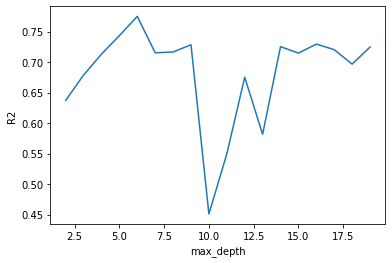

In [33]:
# Visualize which max_depth leads to the highest r2 score
import matplotlib.pyplot as plt
plt.plot(max_depth_range, r2)
plt.xlabel('max_depth')
plt.ylabel('R2');
# best R2 is obtained when the model has a depth of 6

In [34]:
dec_tree_6 = DecisionTreeRegressor(max_depth = 6, random_state = 42)
dec_tree_6.fit(X_train, y_train)
train_6_score = dec_tree_6.score(X_train, y_train)
test_6_score = dec_tree_6.score(X_test, y_test)
print(train_6_score)
print(test_6_score)


0.9299483947011992
0.7749327455268918


In [ ]:
#Seting the depth at 6 improves teh perfomance on the  test data but reduces the perfomance on the train data
#It reduces the gap between the training and test values 

RANDOM FORESTS ON THE SAME DATASET

In [35]:
# Import random forest Regressor Model
from sklearn.ensemble import RandomForestRegressor
#Test split of the data has already occured

In [36]:
#Step 2: Make an instance of the Model using default parameters
rf = RandomForestRegressor(random_state = 42)

In [37]:
# Look at the hyperparameters
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [38]:
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [39]:
#Predict Values of y
rf.predict(X_test)

array([22.081, 31.34 , 16.21 , 23.106, 14.302, 20.468, 18.849, 13.457,
       20.893, 20.495, 18.609, 19.495,  8.164, 20.775, 19.087, 25.719,
       19.212,  8.662, 45.758, 15.661, 23.741, 23.427, 13.884, 23.462,
       14.975, 14.903, 22.378, 14.614, 19.503, 20.825, 20.157, 23.213,
       29.133, 21.716, 13.686, 15.852, 35.457, 19.554, 20.128, 23.723,
       16.775, 28.189, 45.052, 20.172, 23.507, 14.927, 16.154, 23.89 ,
       18.261, 28.381, 22.219, 34.513, 16.67 , 26.332, 45.725, 21.268,
       15.652, 32.196, 22.81 , 20.292, 26.313, 34.22 , 30.187, 20.148,
       26.989, 17.918, 14.734, 23.004, 26.994, 17.567, 20.347, 25.978,
       11.966, 21.595, 21.222,  7.061, 19.82 , 47.322, 12.869, 11.093,
       22.18 , 13.34 , 22.175,  9.575, 20.642, 26.786, 14.14 , 23.134,
       23.344, 17.571, 22.57 ,  7.897, 18.97 , 19.629, 29.907, 18.929,
       25.451, 13.775, 14.631, 13.52 , 20.223, 26.051, 13.172, 20.629,
       21.856, 13.146, 18.954, 25.378, 21.136, 22.968, 10.744, 16.047,
      

In [40]:
#EValuate perfomance of the model
rf_train_score = rf.score(X_train, y_train)
rf_test_score = rf.score(X_test, y_test)
print(rf_train_score)
print(rf_test_score)
#The untuned score of the random forests is higher than that of the decision trees [the maximum R2 value after tuning the simple decsion tree was 0.774 ]

0.9765957704230458
0.8033227336945771


In [41]:
#TUNE THE RANDOM FORESTS MODEL
#maximum depths of our random forests model = 22
est_depths = [estimator.() for estimator in rf.estimators_]
max(est_depths)


22

In [42]:
#Let us loop and find R2s for the model at differnet depths to find the most probable depth 
depths = range(1, max(est_depths))
scores = pd.DataFrame(index=depths, columns=['Test Score'])
for depth in depths:    
   model = RandomForestRegressor(max_depth=depth)
   model.fit(X_train, y_train)
   scores.loc[depth, 'Train Score'] = model.score(X_train, y_train)
   scores.loc[depth, 'Test Score'] = model.score(X_test, y_test)
   scores.head()


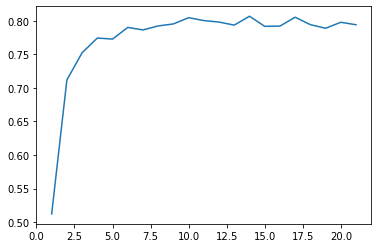

In [43]:
#Visualize our results
plt.plot(scores['Test Score'])   

In [45]:
#Sort and show whihc depth producedthe best scores
sorted_scores = scores.sort_values(by='Test Score', ascending=False)
sorted_scores.head()
#14 provided the highest test score

,Test Score,Train Score
14,0.806619,0.972146
17,0.805171,0.973229
10,0.804495,0.973006
11,0.800187,0.969655
12,0.797935,0.974124


In [ ]:
#Explore if tuning the number of Estimators [Number of Trees] can improvethe model


In [49]:
# choose a couple of values for n_estimators to save time
# you can use another loop later to narrow down the best number
# by trying numbers close to the best one
n_ests = [50, 100, 150, 200, 250]
scores2 = pd.DataFrame(index=n_ests, columns=['Test Score', 'Train Score'])
for n in n_ests:
   model = RandomForestRegressor(max_depth=22, n_estimators=n)
   model.fit(X_train, y_train)
   scores2.loc[n, 'Train Score'] = model.score(X_train, y_train)
   scores2.loc[n, 'Test Score'] = model.score(X_test, y_test)
scores2.head()


,Test Score,Train Score
50,0.781644,0.972086
100,0.789104,0.975887
150,0.800282,0.975943
200,0.797961,0.974876
250,0.797491,0.976356


Text(0, 0.5, 'Testing Accuracy')

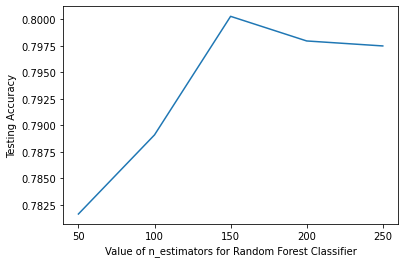

In [51]:
plt.plot(scores2['Test Score'])
plt.xticks(n_ests);
plt.xlabel('Value of n_estimators for Random Forest Classifier')
plt.ylabel('Testing Accuracy')

In [ ]:
#No significant improvement in the model by tuning the number of estimators
#Keep a maximum depth of 14 for use as the final model plot

RUN THE BAGGED TREE MODEL

In [52]:
# Import the bagging regressor
from sklearn.ensemble import BaggingRegressor

In [53]:
#Step 2: Make an instance of the Model
#This is a place where we could tune the hyperparameters of a model, but for now, let's use the default parameters.
bagreg = BaggingRegressor(random_state = 42)

In [54]:
# Look at the hyperparameters
bagreg.get_params()

{'base_estimator': 'deprecated',
 'bootstrap': True,
 'bootstrap_features': False,
 'estimator': None,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [56]:
#Train the Model
bagreg.fit(X_train, y_train)

BaggingRegressor(random_state=42)

In [57]:
#Predict Values of y based in x
bagreg.predict(X_test)

array([22.46, 30.6 , 16.33, 24.27, 13.8 , 19.62, 18.33, 13.07, 21.02,
       21.84, 17.61, 18.27,  7.75, 19.81, 18.71, 23.58, 17.66,  8.54,
       46.56, 16.04, 23.75, 23.17, 13.19, 25.34, 14.45, 15.22, 23.  ,
       15.84, 18.37, 20.82, 20.04, 22.96, 32.33, 21.82, 13.3 , 14.71,
       35.28, 19.68, 19.64, 24.26, 18.31, 26.53, 46.56, 20.46, 25.57,
       15.54, 16.35, 24.29, 17.78, 28.55, 22.45, 32.6 , 16.26, 26.2 ,
       48.02, 22.06, 15.04, 32.04, 23.91, 19.93, 25.87, 33.83, 26.86,
       20.16, 25.97, 15.39, 14.39, 22.94, 26.78, 16.96, 19.85, 26.2 ,
       11.85, 21.51, 20.57,  6.91, 20.01, 47.49, 13.21, 11.22, 23.42,
       12.25, 22.77, 10.33, 21.41, 26.28, 13.87, 23.38, 23.22, 17.38,
       23.11,  8.3 , 19.09, 19.38, 31.07, 19.05, 24.87, 12.91, 14.36,
       14.16, 19.71, 25.02, 12.94, 26.27, 22.19, 12.58, 18.92, 25.  ,
       21.7 , 22.6 ,  9.74, 15.01, 21.62, 23.86, 33.37, 14.29, 43.69,
       17.27, 18.66, 24.79, 20.79, 24.69,  9.07, 21.3 , 24.32, 22.12,
       24.61])

In [ ]:
#EVALUATE THE PERFOMANCE OF THE MODEL

In [58]:
bagreg_train_score = bagreg.score(X_train, y_train)
bagreg_test_score = bagreg.score(X_test, y_test)
print(bagreg_train_score)
print(bagreg_test_score)

0.9586125192554636
0.7646609528841815


In [ ]:
#ACROSS THE TWO MODELS TEH RANDOM FORESTS PROVIDES A BETTER ESTIMATE THAN THE DECSION TREES AND THE BAGGED TREES

In [ ]:
#The reandom forests model based on the traininbg data will at about 80 percent predict the y (outcome) of the test variable based when fed with the test features[ X variables of teh test data]

In [ ]:
#END OF ASSIGNMENT